In [41]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [42]:
# 정규화 0~1
train_scaled = train_input / 255.0

# 훈련세트, 검증 세트
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [43]:
# 층을 구성하는 함수
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [44]:
model = model_fn()
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- mode.fit() : verbose - 0 : 출력 X, 1: 학습 진행율, 정확도, 에포크, 2: 정확도, 로스, 에포크

In [45]:
model.compile(loss='sparse_categorical_crossentropy',  metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7680 - loss: 0.6745
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8536 - loss: 0.4092
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8716 - loss: 0.3520
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8849 - loss: 0.3260
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8864 - loss: 0.3139


In [46]:
hist.history

{'accuracy': [0.812208354473114,
  0.8583541512489319,
  0.8713958263397217,
  0.8810625076293945,
  0.8866458535194397],
 'loss': [0.5315194725990295,
  0.3958510756492615,
  0.3547113537788391,
  0.33217498660087585,
  0.3160736560821533]}

Text(0.5, 1.0, 'loss')

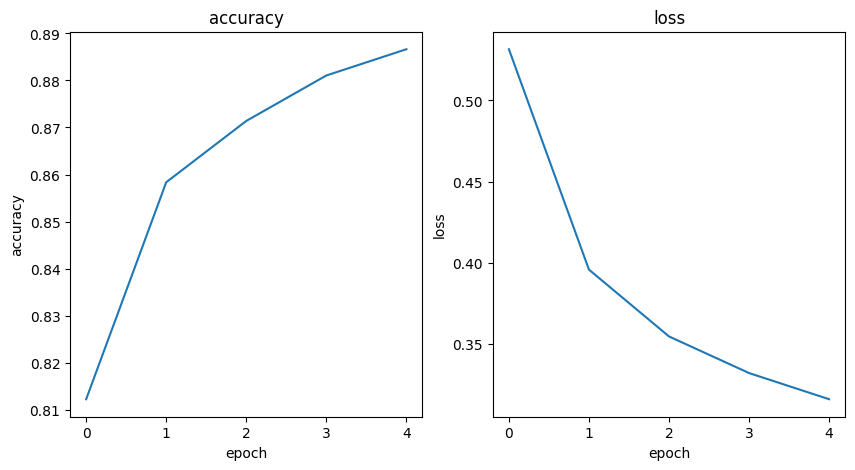

In [47]:
# 정확도, 로스
import matplotlib.pyplot as plt
_, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(hist.history['accuracy'])
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')
axs[0].set_title('accuracy')

axs[1].plot(hist.history['loss'])
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss')
axs[1].set_title('loss')

In [48]:
# 검증 손실
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7713 - loss: 0.6599 - val_accuracy: 0.8593 - val_loss: 0.4051
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8569 - loss: 0.4015 - val_accuracy: 0.8614 - val_loss: 0.3827
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8698 - loss: 0.3602 - val_accuracy: 0.8695 - val_loss: 0.3629
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8808 - loss: 0.3333 - val_accuracy: 0.8726 - val_loss: 0.3582
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8883 - loss: 0.3161 - val_accuracy: 0.8776 - val_loss: 0.3554
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8928 - loss: 0.3020 - val_accuracy: 0.8790 - val_loss: 0.3644
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8966 - loss: 0.2911 - val_accuracy: 0.8806 - val_loss: 0.3516
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9002 - loss: 0.2805 - 

In [49]:
hist.history

{'accuracy': [0.8143333196640015,
  0.8605416417121887,
  0.8730624914169312,
  0.8809999823570251,
  0.8867291808128357,
  0.8913750052452087,
  0.8941666483879089,
  0.8987083435058594,
  0.9010416865348816,
  0.903166651725769,
  0.906291663646698,
  0.9078124761581421,
  0.9097708463668823,
  0.9118333458900452,
  0.9136041402816772,
  0.9152083396911621,
  0.9167083501815796,
  0.9197083115577698,
  0.9212499856948853,
  0.9225624799728394],
 'loss': [0.5280572772026062,
  0.3906824588775635,
  0.35298725962638855,
  0.3315229117870331,
  0.3163153827190399,
  0.30423033237457275,
  0.2939724922180176,
  0.2848520576953888,
  0.27718237042427063,
  0.2732270359992981,
  0.26416730880737305,
  0.2585758864879608,
  0.25475645065307617,
  0.2496502697467804,
  0.24491310119628906,
  0.239334374666214,
  0.23652978241443634,
  0.230194091796875,
  0.22705116868019104,
  0.22240404784679413],
 'val_accuracy': [0.859333336353302,
  0.8614166378974915,
  0.8694999814033508,
  0.87258332

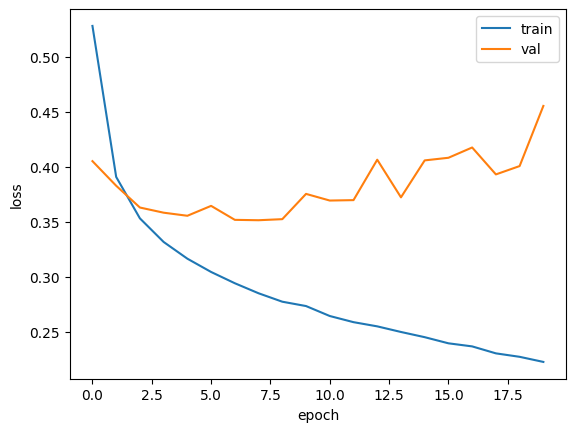

In [50]:
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [51]:
# 옵티마이저 - adam
model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.001) # learning_rate : 기본값 0.1

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7751 - loss: 0.6578 - val_accuracy: 0.8403 - val_loss: 0.4500
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8567 - loss: 0.3986 - val_accuracy: 0.8606 - val_loss: 0.3894
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8762 - loss: 0.3505 - val_accuracy: 0.8653 - val_loss: 0.3758
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8811 - loss: 0.3265 - val_accuracy: 0.8754 - val_loss: 0.3487
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8886 - loss: 0.3016 - val_accuracy: 0.8754 - val_loss: 0.3445
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8907 - loss: 0.2950 - val_accuracy: 0.8825 - val_loss: 0.3239
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8964 - loss: 0.2806 - val_accuracy: 0.8813 - val_loss: 0.3448
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8998 - loss: 0.2688 - 

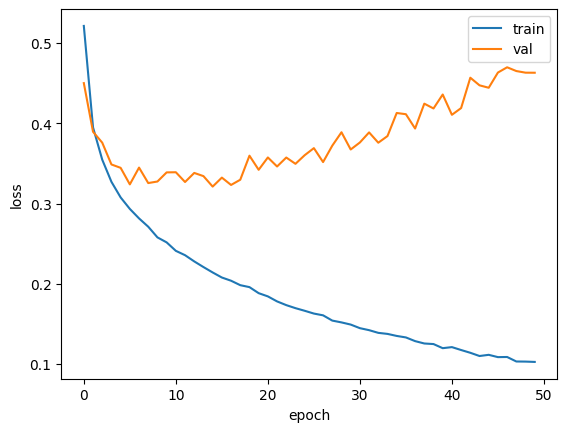

In [52]:
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [58]:
# 드롭아웃 : 설정된 비율만큼 은닉층의 출력을 랜덤하게 0으로 만든다 / 과대적합을 완화
model = model_fn(keras.layers.Dropout(0.3)) # 30 퍼 정도 은닉층의
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7320 - loss: 0.7674 - val_accuracy: 0.8357 - val_loss: 0.4503
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8398 - loss: 0.4504 - val_accuracy: 0.8600 - val_loss: 0.3848
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8547 - loss: 0.4070 - val_accuracy: 0.8657 - val_loss: 0.3636
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8644 - loss: 0.3796 - val_accuracy: 0.8694 - val_loss: 0.3538
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8665 - loss: 0.3691 - val_accuracy: 0.8746 - val_loss: 0.3448
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8690 - loss: 0.3553 - val_accuracy: 0.8725 - val_loss: 0.3423
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8733 - loss: 0.3391 - val_accuracy: 0.8758 - val_loss: 0.3433
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8772 - loss: 0.3335 - 

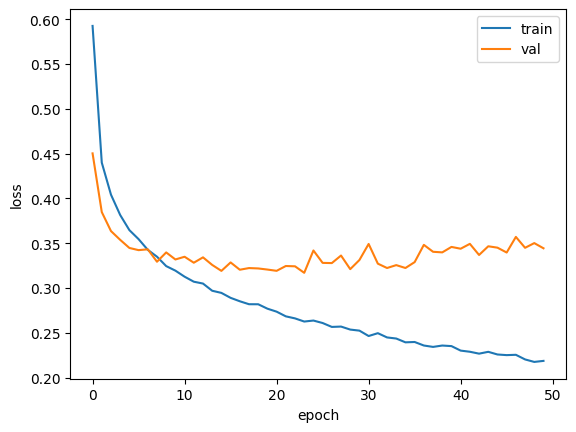

In [60]:
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [61]:
# 모델 저장, 복원 - 모델 저장, 가중치 저장

# 가중치 저장 - model.save_weights('파일명') # 파일명 확장자 h5
model.save_weights("model.weights.h5")

In [62]:
# 모델 저장 : 구조 + 가중치 - model.save("파일명") # 파일명 확장자 .keras
model.save('model-whole.keras')

In [63]:
# 가중치 파일로 모델 복구 - 원래 모델의 구조가 필요!
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [66]:
import numpy as np
test_scaled = test_input / 255.0
predictions = model.predict(test_scaled[:10])
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [67]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8888 - loss: 0.3723


[0.36951324343681335, 0.8852999806404114]

In [68]:
# 전체 모델을 저장한 파일로 복구 / 구조 + 가중치
model = keras.models.load_model('model-whole.keras')

predictions = model.predict(test_scaled[:10])
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [69]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8888 - loss: 0.3723


[0.36951324343681335, 0.8852999806404114]

In [ ]:
# 콜백 - ModelCheckpoint : 검증 세트의 손실이 가장 낮은 최고의 모델을 찾아서 저장
# 콜백 - EarlyStopping : 조기종료, patience : 검증 손실이 더 이상 개선되지 않는 횟수
#        monitor=['val_loss'] : 기본값
#        restore_best_weights : 가장 최적의 가중치로 복구

In [75]:
model = model_fn(keras.layers.Dropout(0.3))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True) # 검증 세트의 손실값이 가장 낮은 모델로 저장

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7306 - loss: 0.7713 - val_accuracy: 0.8448 - val_loss: 0.4240
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8396 - loss: 0.4439 - val_accuracy: 0.8557 - val_loss: 0.3878
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8517 - loss: 0.4048 - val_accuracy: 0.8697 - val_loss: 0.3618
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8593 - loss: 0.3796 - val_accuracy: 0.8681 - val_loss: 0.3546
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8651 - loss: 0.3641 - val_accuracy: 0.8713 - val_loss: 0.3525
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8726 - loss: 0.3479 - val_accuracy: 0.8758 - val_loss: 0.3356
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8722 - loss: 0.3410 - val_accuracy: 0.8788 - val_loss: 0.3291
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8801 - loss: 0.3288 - 

In [76]:
model = keras.models.load_model('best-model.keras')

In [77]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.8821 - loss: 0.3253


[0.32652467489242554, 0.8819166421890259]